#### Introduction to Time Series and Stationarity

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
candy = pd.read_csv("./data/candy_production.csv", index_col="date", parse_dates=True)

In [3]:
candy.head()

IPG3113N
date                 
1972-01-01  85.598809
1972-02-01  71.741404
1972-03-01  65.948809
1972-04-01  64.490724
1972-05-01  64.933842

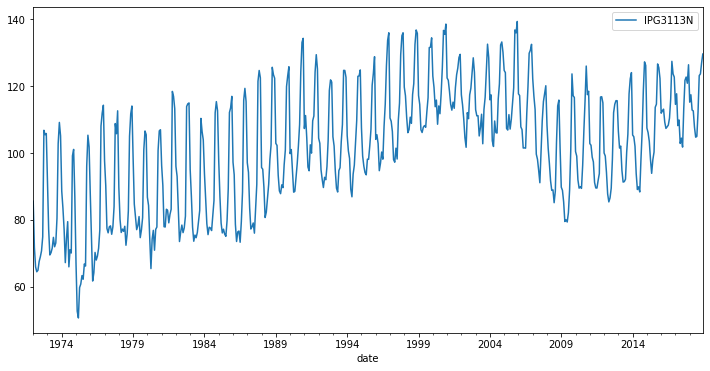

In [4]:
candy.plot(figsize=(12,6))
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
quakes = pd.read_csv("./data/earthquakes.csv", index_col="date", parse_dates=True)
quakes.head()

Year  earthquakes_per_year
date                                  
1900-01-01  1900                  13.0
1901-01-01  1901                  14.0
1902-01-01  1902                   8.0
1903-01-01  1903                  10.0
1904-01-01  1904                  16.0

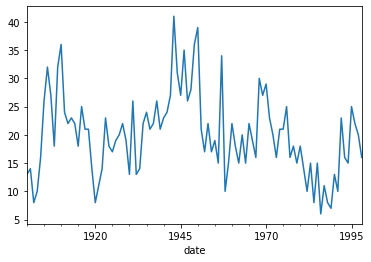

In [6]:
quakes["earthquakes_per_year"].plot()

In [7]:
quakes_dickey_fuller_test = adfuller(quakes["earthquakes_per_year"])
print(quakes_dickey_fuller_test)

(-3.1831922511917816, 0.020978425256003668, 2, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 549.0681467660734)


In [8]:
quakes_first_diff = quakes.diff().dropna()
quakes_first_diff

Year  earthquakes_per_year
date                                  
1901-01-01   1.0                   1.0
1902-01-01   1.0                  -6.0
1903-01-01   1.0                   2.0
1904-01-01   1.0                   6.0
1905-01-01   1.0                  10.0
...          ...                   ...
1994-01-01   1.0                  -1.0
1995-01-01   1.0                  10.0
1996-01-01   1.0                  -3.0
1997-01-01   1.0                  -2.0
1998-01-01   1.0                  -4.0

[98 rows x 2 columns]

In [9]:
quakes_second_diff = quakes.diff().diff().dropna()
quakes_second_diff

Year  earthquakes_per_year
date                                  
1902-01-01   0.0                  -7.0
1903-01-01   0.0                   8.0
1904-01-01   0.0                   4.0
1905-01-01   0.0                   4.0
1906-01-01   0.0                  -4.0
...          ...                   ...
1994-01-01   0.0                   6.0
1995-01-01   0.0                  11.0
1996-01-01   0.0                 -13.0
1997-01-01   0.0                   1.0
1998-01-01   0.0                  -2.0

[97 rows x 2 columns]

In [10]:
amazon = pd.read_csv("./data/amazon_close.csv", index_col="date", parse_dates=True)
amazon.head()

close
date               
2019-02-08  1588.22
2019-02-07  1614.37
2019-02-06  1640.26
2019-02-05  1658.81
2019-02-04  1633.31

In [11]:
amazon_first_diff = amazon.diff().dropna()
amazon_first_diff_adf_test = adfuller(amazon_first_diff["close"])
print(amazon_first_diff_adf_test)

(-7.203579488811219, 2.3312717254875353e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


In [12]:
amazon_log_return = np.log(amazon/amazon.shift(1)).dropna()
amazon_log_return_adf_test = adfuller(amazon_log_return["close"])
print(amazon_log_return_adf_test)

(-34.915748536059674, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


In [13]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

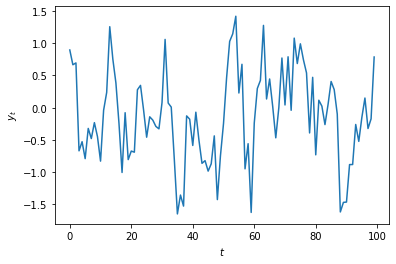

In [14]:
ar_coefs = [1, -0.2]
ma_coefs = [1, 0.3, 0.5]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [15]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1, 1))

# Fit the model
results = model.fit()

In [16]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                 -86.290
Method:                       css-mle   S.D. of innovations              0.572
Date:                Sun, 22 Dec 2019   AIC                            180.580
Time:                        11:44:07   BIC                            191.000
Sample:                             0   HQIC                           184.797
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1023      0.148     -0.690      0.492      -0.393       0.188
ar.L1.y        0.6537      0.103      6.368      0.000       0.453       0.855
ma.L1.y       -0.0900      0.112     -0.806      0.4

##### Instantiate an ARMAX model
`model = ARMA(hospital["wait_times_hrs"], (2,1), endog=hospital["nurse_count"])`

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
amazon = pd.read_csv("./data/amazon_close.csv", index_col="date", parse_dates=True).sort_index(ascending=True)["2018":]
model = SARIMAX(amazon, order=(3, 1, 3))
results = model.fit()
print(results.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                  278
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1389.559
Date:                Sun, 22 Dec 2019   AIC                           2793.118
Time:                        14:58:09   BIC                           2818.486
Sample:                             0   HQIC                          2803.296
                                - 278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0264      0.049     -0.536      0.592      -0.123       0.070
ar.L2         -0.1018      0.039     -2.592      0.010      -0.179      -0.025
ar.L3         -0.9444      0.036    -25.918      0.0

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


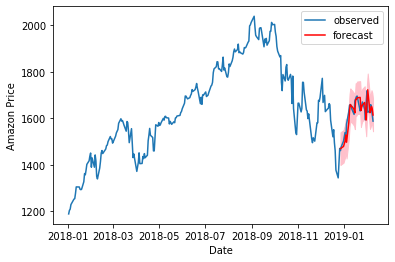

In [95]:
forecast = results.get_prediction(start=-30)
mean_forecast = forecast.predicted_mean
confidence_interval = forecast.conf_int()
plt.plot(amazon.index, amazon["close"], label="observed")
plt.plot(mean_forecast.index, mean_forecast, color="red", label="forecast")
plt.fill_between(confidence_interval.index, confidence_interval["lower close"],
                 confidence_interval["upper close"], color='pink')
plt.xlabel("Date")
plt.ylabel("Amazon Price")
plt.legend()
plt.show()

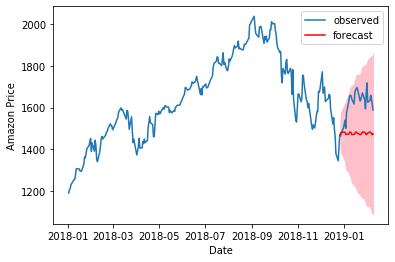

In [96]:
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)
mean_dynamic_forecast = dynamic_forecast.predicted_mean
confidence_interval_dynamic_forecast = dynamic_forecast.conf_int()
plt.plot(amazon.index, amazon["close"], label="observed")
plt.plot(mean_dynamic_forecast.index, mean_dynamic_forecast, color="red", label="forecast")
plt.fill_between(confidence_interval_dynamic_forecast.index, confidence_interval_dynamic_forecast["lower close"],
                 confidence_interval_dynamic_forecast["upper close"], color='pink')
plt.xlabel("Date")
plt.ylabel("Amazon Price")
plt.legend()
plt.show()